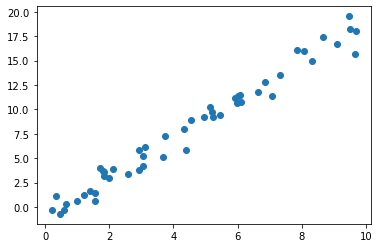

In [17]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [38]:
X=x[:,np.newaxis]
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

In [40]:
x.reshape(-1,1)


array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)

In [6]:
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [7]:
model.coef_

array([1.9776566])

In [8]:
model.intercept_

-0.9033107255311164

In [34]:
x_test=np.linspace(-1,11)
y_pred=model.predict(x_test.reshape(-1,1))

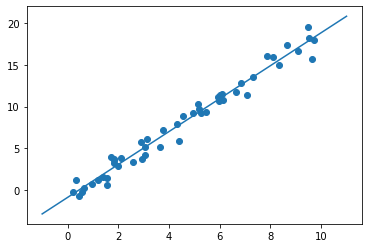

In [35]:
plt.scatter(x,y)
plt.plot(x_test,y_pred)

In [42]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [43]:
import seaborn as sns

In [56]:
iris=sns.load_dataset('iris')

In [57]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
# X_iris=iris[['sepal_length','sepal_width','petal_length','petal_width']]
# X_iris=iris.iloc[:,:-1]
X_iris=iris.drop(['species'],axis=1)
X_iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [70]:
y_iris=iris['species']


In [71]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,random_state=1)

In [72]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(Xtrain,ytrain)
    

GaussianNB()

In [75]:
y_pred=model.predict(Xtest)
model.score(Xtest,ytest)

0.9736842105263158

In [81]:
from sklearn.decomposition import PCA


In [84]:
pc=PCA(n_components=2)
data=pc.fit_transform(X_iris)

In [89]:
data.shape

(150, 2)

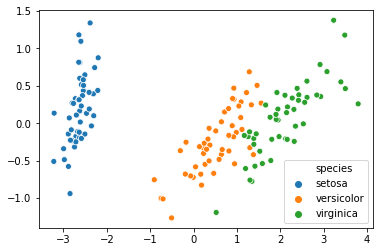

In [90]:
sns.scatterplot(data[:,0],data[:,1],hue=iris['species'])

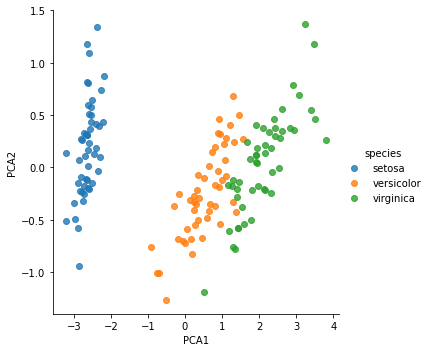

In [88]:
 iris['PCA1'] = data[:, 0]
 iris['PCA2'] = data[:, 1]
sns.lmplot('PCA1','PCA2',hue='species', data=iris, fit_reg=False)

In [91]:
pc.explained_variance_ratio_

array([0.92461872, 0.05306648])

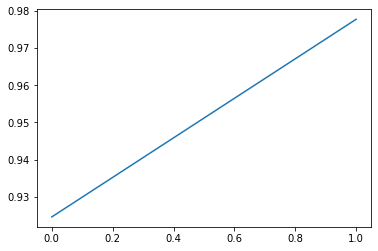

In [93]:

plt.plot(np.cumsum(pc.explained_variance_ratio_))

In [102]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape


(1797, 64)

In [103]:
x=digits.data
y=digits.target

In [104]:
pc=PCA(n_components=2)

In [105]:
data=pc.fit_transform(x)


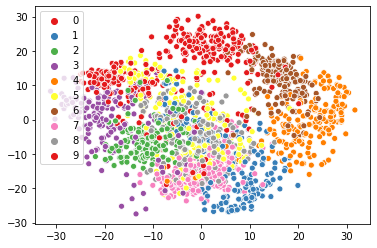

In [107]:
sns.scatterplot(data[:,0],data[:,1],hue=digits.target,p)

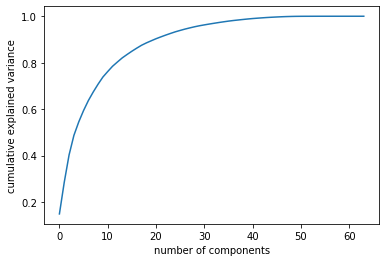

In [117]:
pca = PCA()
pc=pca.fit(x)
plt.plot(np.cumsum(pc.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');